In [3]:
# A Jupyter notebook for gathering and formatting location data using Yelp's API and Python

# Resources:
# Python 'requests' HTTP library - https://requests.readthedocs.io/en/master/


In [14]:
import requests
import json

In [15]:
YELP_API_KEY = 'OA7QK3BGg6NX8NSPb2e4nTvvpHuw99lCUgZa5WAVYBYR2nu-zbVejthwyDKMraMV1Dhq85FGGl_jPzcd7rB-mGS97yyHCTLYG_Bw3ccA6T9C6Aj4M57FBgWysiPFX3Yx'

location_types = ['alcohol', 'automotive', 'bank', 'barber', 'coffee', 'hiking', 'hotel', 'landscaping', 'lawyer', 'police', 'school', 'steak', 'theater', 'towing']

all_businesses = []
n_requests_made = 0

for location_type in location_types:
    
    try: 
        request_url = f'https://api.yelp.com/v3/businesses/search'
        headers={'Authorization': f'Bearer {YELP_API_KEY}'}

        url_params = {
            'term': location_type,
            'location': 'Connecticut',
            'limit': 50,
            'offset': 0
        }
        # Make one request to find the total number of results returned.
        r_initial = requests.get(request_url, headers=headers, params=url_params)
        n_requests_made += 1
        n_businesses = r_initial.json()["total"]
        print(f"# of {location_type} locations ", n_businesses)

        offset = 0
        counter = 1

        # Get all results returned，50 at a time
        while offset < n_businesses:

            url_params['offset'] = offset
            offset += 50

            # Make request to get 50 more businesses
            r = requests.get(request_url, headers=headers, params=url_params)
            n_requests_made += 1

            # The payload of 50 businesses in JSON
            businesses_payload = r.json()['businesses']

            # Append new businesses
            all_businesses += businesses_payload

    except Exception as e:
        print("Exception=", e)

# print('abcdefg')
print("Total # of locations retrieved = ", len(all_businesses))

# (Daily total limit of 5,000)
print("Total # of request made = ", n_requests_made)

# of alcohol locations  177
# of automotive locations  420
# of bank locations  78
# of barber locations  62
# of coffee locations  288
# of hiking locations  15
# of hotel locations  34
# of landscaping locations  117
# of lawyer locations  84
# of police locations  7
# of school locations  72
# of steak locations  423
# of theater locations  67
# of towing locations  79
Total # of locations retrieved =  1895
Total # of request made =  60


In [17]:
#all_businesses

alcohol
automotive
bank
barber
coffee
hiking
hotel
landscaping
lawyer
police
school
steak
theater
towing


In [24]:
# class DefaultLocation : public BaseLocation
# {

#     std::string type = "";
#     std::string name = "";
#     std::string yelp_url = "";
#     double rating;
#     std::string street_address = "";
#     std::string city = "";
#     std::string state = "";
#     std::string zip_code = "";
#     std::string phone_number = "";
#     int review_count;

# };

# NOTE: The struct string below now includes methods
# to remove all commas from incoming string data.


for location_type in location_types:

    fname = "CT_" + location_type.replace(" ", "_") + "s.csv"
    with open(fname, "w") as f:
        try:
            for b in all_businesses:            
                # Not all businesses have a 'price' attr. listed
                struct = f"{b['coordinates']['latitude']},{b['coordinates']['longitude']},{location_type},{str(b['name']).replace(',', ' ')},{b['url']},{b['rating']},{str(b['location']['address1']).replace(',', ' ')},{str(b['location']['city']).replace(',', ' ')},{str(b['location']['state']).replace(',', ' ')},{b['location']['zip_code']},{str(b['display_phone']).replace(',', ' ')},{b['review_count']}"
                struct += "\n"
                #print(struct)
                f.write(struct)
            
#             # Dedupe each data set, and drop incomplete rows
#             type_data_set = pd.read_csv(fname).drop_duplicates().dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
            
            
        except Exception as e:
            print(e)

    

In [40]:
# Checking properties of individual type files.

# 1,894 rows
# CT_master_dirty = pd.read_csv('CT_master_dirty.csv', header=None)
# #CT_master_dirty.info()
# cleaned_CT_master = CT_master_dirty.drop_duplicates().dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# cleaned_CT_master.info()

# Output cleaned CT master
cleaned_CT_master.to_csv('CT/CT_master_clean.csv', index=False, header=False)

In [2]:
import pandas as pd
# REGEX
import re

In [2]:
cleaned = pd.read_csv('dec5_cleaned_master.csv',
                 lineterminator='\n',
                 header=None)

#cleaned = 

In [3]:
cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 12 columns):
0     9850 non-null float64
1     9850 non-null float64
2     9850 non-null object
3     9850 non-null object
4     9850 non-null object
5     9850 non-null float64
6     9850 non-null object
7     9850 non-null object
8     9850 non-null object
9     9850 non-null object
10    9850 non-null object
11    9850 non-null object
dtypes: float64(3), object(9)
memory usage: 923.5+ KB


In [9]:

# Drop the extra street address axis, dedupe, drop empty rows
# cleaned = df.drop(6, axis=1).drop_duplicates().dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# cleaned



In [10]:
# cleaned = cleaned[[0, 1, 2, 3, 4, 5, 11, 7, 8, 9, 10, 12]]
# cleaned

In [4]:
# Removing any rows with a comma in the name (which is the only place for a comma to go)
# Turns out there already are none. Same # rows before and after.
#cleaned = cleaned[cleaned[5].apply(lambda x: isinstance(x, float))]
#cleaned

In [52]:
# December 5
#cleaned.to_csv('dec5_cleaned_master.csv', index=False)

In [13]:
# December 6

# New file 'cleaned' file contains all past changes.

# Goal: Search for errors in the dataset and remove afflicted rows. (FOUND NO MORE BAD ROWS)

# Change second arg to 'None' to display every rows.
pd.set_option('display.max_rows', 10)
cleaned

,0,1,2,3,4,5,6,7,8,9,10,11
0,41.820150,-71.398170,alcohol,Campus Fine Wines,https://www.yelp.com/biz/campus-fine-wines-pro...,4.0,127 Brook St,Providence,RI,02906,(401) 621-9650,45
1,41.852177,-71.401346,alcohol,City Liquors,https://www.yelp.com/biz/city-liquors-providen...,3.5,1173 N Main St,Providence,RI,02904,(401) 831-2337,16
2,41.821982,-71.404509,alcohol,Bin 312,https://www.yelp.com/biz/bin-312-providence?ad...,5.0,312 S Main St,Providence,RI,02903,(401) 714-0040,55
3,41.825654,-71.386786,alcohol,Bottles Fine Wine,https://www.yelp.com/biz/bottles-fine-wine-pro...,4.0,141 Pitman St,Providence,RI,02906,(401) 372-2030,126
4,41.842419,-71.408478,alcohol,Nikki's Liquors,https://www.yelp.com/biz/nikkis-liquors-provid...,4.5,32 Branch Ave,Providence,RI,02904,(401) 861-9006,67
...,...,...,...,...,...,...,...,...,...,...,...,...
9845,42.479850,-71.119630,towing,Valvoline Instant Oil Change,https://www.yelp.com/biz/valvoline-instant-oil...,3.5,320 Montvale Ave,Woburn,MA,01801,(781) 933-2981,36
9846,42.429019,-71.013588,towing,Firestone Complete Auto Care,https://www.yelp.com/biz/firestone-complete-au...,1.5,339 Squire Rd,Revere,MA,02151,(781) 289-3720,15
9847,42.223062,-72.192116,towing,Intercity Lines,https://www.yelp.com/biz/intercity-lines-warre...,4.5,552 Old W Brookfield Rd,Warren,MA,01083,(800) 221-3936,41
9848,41.779066,-70.001852,towing,Cape Cod Truck,https://www.yelp.com/biz/cape-cod-truck-orlean...,2.5,300 Cranberry Hwy Rt 6A,Orleans,MA,02653,(508) 255-6533,3


In [81]:
cleaned_ct = pd.read_csv('CT/CT_master_clean.csv', header=None)

# Concatenate cleaned_master.csv
pd.set_option('display.max_rows', 10)

cleaned_ct[9] = cleaned_ct[9].apply(lambda x: str(x))

# cleaned_ct[9]

# # Fixing errors
# # cleaned_ct = cle
# #cleaned_ct

def fix_zip_codes_len(x):
    #print(len(x))
    x = x[:-2]
    if len(x) < 5:
        return '0' + x

    if len(x) > 5:
        return x[0:]
    
    return x
    
    
    
cleaned_ct[9] = cleaned_ct[9].apply(fix_zip_codes_len)

# pd.set_option('display.max_rows', 10)
cleaned_ct.to_csv('CT/CT_master_clean.csv', index=False, header=False)



In [97]:
# Goal concatenate CT data and MA/RI data into one file

# csvs_to_concat = ['CT/CT_master_dirty.csv', 'dec5_cleaned_master.csv']
CT_master_clean = pd.read_csv('CT/CT_master_clean.csv', header=None)
dec5_master = pd.read_csv('dec5_cleaned_master.csv', header=None)
df = pd.concat([CT_master_clean, dec5_master])
df.info()

def fix_zip_codes_len(x):
    #print(len(x))
    if len(x) < 5:
        return '0' + x

    if len(x) > 5:
        return x[0:]
    
    return x

df[9] = df[9].apply(lambda x: str(x)).apply(fix_zip_codes_len)

pd.set_option('display.max_rows', 10)
df.drop_duplicates(subset=[0,1,3]).info()
#df.to_csv('CT_MA_RI_cleaned.csv', index=False, header=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11353 entries, 0 to 9849
Data columns (total 12 columns):
0     11353 non-null float64
1     11353 non-null float64
2     11353 non-null object
3     11353 non-null object
4     11353 non-null object
5     11353 non-null float64
6     11353 non-null object
7     11353 non-null object
8     11353 non-null object
9     11353 non-null object
10    11353 non-null object
11    11353 non-null object
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10188 entries, 0 to 11352
Data columns (total 12 columns):
0     10188 non-null float64
1     10188 non-null float64
2     10188 non-null object
3     10188 non-null object
4     10188 non-null object
5     10188 non-null float64
6     10188 non-null object
7     10188 non-null object
8     10188 non-null object
9     10188 non-null object
10    10188 non-null object
11    10188 non-null object
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from scipy import stats


%matplotlib inline

# Make a map of data

In [16]:
df = pd.read_csv('CT_MA_RI_cleaned.csv', header=None)
# df.head()
lat_long = pd.concat([df[0], df[1]], axis = 1)
lat_long.columns = ['latitude', 'longitude']
crs = {'init': 'espg:4326'}

lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10188 entries, 0 to 10187
Data columns (total 2 columns):
latitude     10188 non-null float64
longitude    10188 non-null float64
dtypes: float64(2)
memory usage: 159.3 KB


In [3]:
BBox = (lat_long.longitude.min(), lat_long.longitude.max(), lat_long.latitude.min(), lat_long.latitude.max())
BBox


(-117.3754942, -0.14808, 33.9806005, 51.570903)

In [17]:
# Removing outliers
lat_long = lat_long[(np.abs(stats.zscore(lat_long)) < 3).all(axis=1)].dropna().reset_index()
BBox = (lat_long.longitude.min(), lat_long.longitude.max(), lat_long.latitude.min(), lat_long.latitude.max())
BBox

lat_long.head(11000)

,index,latitude,longitude
0,0,41.767530,-72.674590
1,1,41.764450,-72.732040
2,2,41.767450,-72.677280
3,3,41.743665,-72.729620
4,4,41.724737,-72.731195
5,5,41.725027,-72.757158
6,6,41.759950,-72.702430
7,7,41.756898,-72.714531
8,8,41.732914,-72.732287
9,9,41.757393,-72.724823


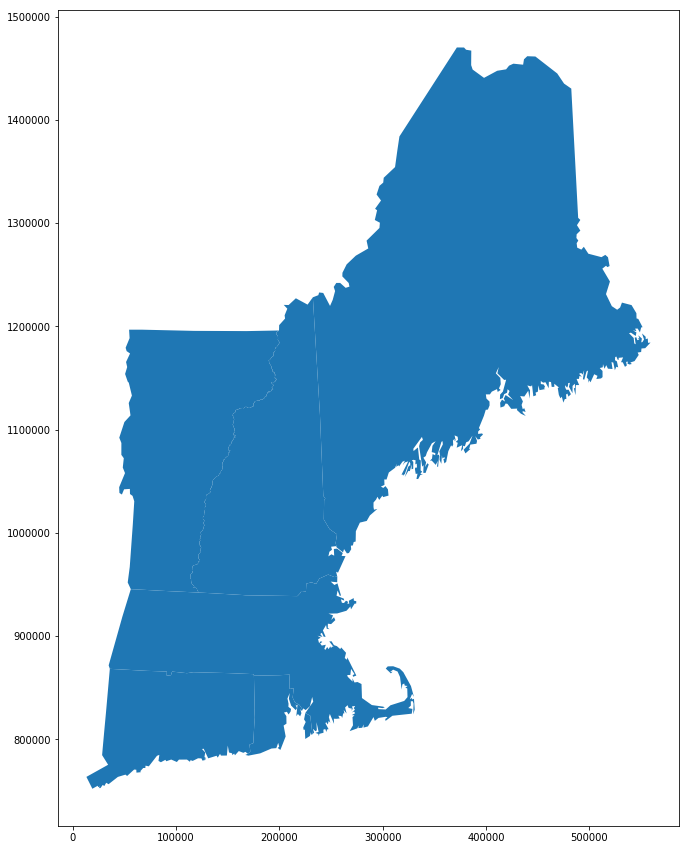

In [18]:
ne_map = gpd.read_file('newengland/NEWENGLAND_POLY.shp')
fig,ax = plt.subplots(figsize=(15,15))
ne_map.plot(ax=ax)

In [19]:

geometry = [Point(xy) for xy in zip(lat_long['longitude'], lat_long['latitude'])]
geometry[:3]

In [20]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

ValueError: Length of values does not match length of index

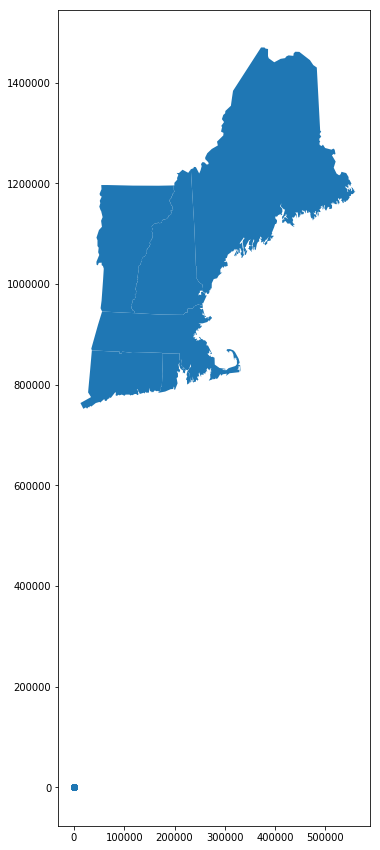

In [9]:
fig,ax = plt.subplots(figsize=(15,15))
ne_map.plot(ax=ax)
geo_df.plot(ax=ax)

In [4]:
#Fixing duplicated in CT_MA_RI_cleaned.csv

df = pd.read_csv('CT_MA_RI_cleaned.csv', header=None)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11353 entries, 0 to 11352
Data columns (total 12 columns):
0     11353 non-null float64
1     11353 non-null float64
2     11353 non-null object
3     11353 non-null object
4     11353 non-null object
5     11353 non-null float64
6     11353 non-null object
7     11353 non-null object
8     11353 non-null object
9     11353 non-null object
10    11353 non-null object
11    11353 non-null object
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11353 entries, 0 to 11352
Data columns (total 12 columns):
0     11353 non-null float64
1     11353 non-null float64
2     11353 non-null object
3     11353 non-null object
4     11353 non-null object
5     11353 non-null float64
6     11353 non-null object
7     11353 non-null object
8     11353 non-null object
9     11353 non-null object
10    11353 non-null object
11    11353 non-null object
dtypes: float64(3), object(9)
memory usage: 1.1+ MB
